## Stochastic Kriging Models

A paper study for https://pubsonline.informs.org/doi/epdf/10.1287/opre.1090.0754

In preparation of https://www.sciencedirect.com/science/article/pii/S0098135418304344?ref=pdf_download&fr=RR-2&rr=85a1d9b33b6a2d08


### A review for Kriging

### Motivating Problem

$$ y = -cos(\pi x) + sin (\pi x) +
 \epsilon, \quad \quad \epsilon \in N(0, 0.4)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(1234)
n = 100
X = np.random.rand(n, 1) * 10  # Training inputs, n x 1 vector
sigma = 0.4  # Noise standard deviation
f_true = lambda x: -np.cos(np.pi * x) + np.sin(4. * np.pi * x)
Y = f_true(X) + sigma * np.random.randn(n, 1)  # Training outputs

In [2]:
import GPy

# Define the kernel
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

# Create the GP model
gp_model = GPy.models.GPRegression(X, Y, kernel)

# Optimize the model (find the best hyperparameters)
gp_model.optimize(messages=True)

# Print the optimized model's parameter values
print(gp_model)


Name : GP regression
Objective : 108.70281766913203
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   1.0853182265615715  |      +ve      |        
  rbf.lengthscale          |  0.12151383247295608  |      +ve      |        
  Gaussian_noise.variance  |  0.13296135708748444  |      +ve      |        


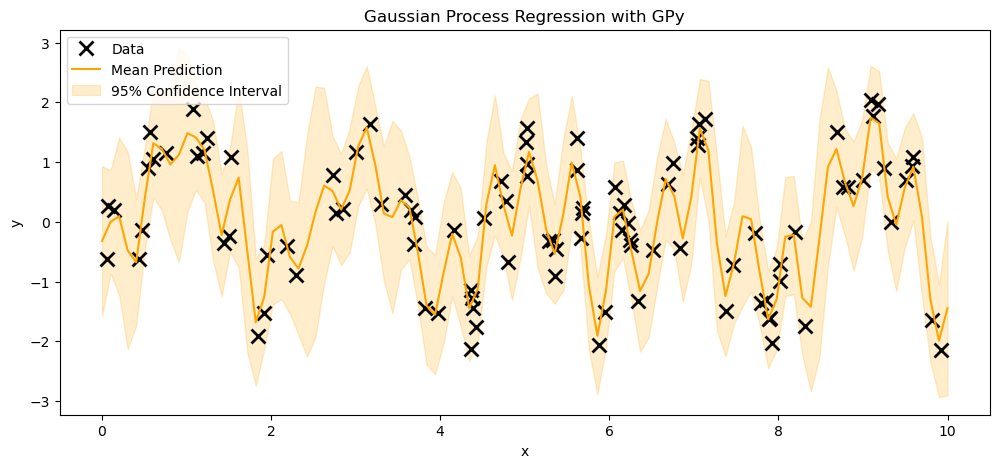

In [3]:
# Predict at new data points
X_new = np.linspace(0, 10, 100).reshape(-1, 1)  # Test inputs
Y_pred, Y_var = gp_model.predict(X_new)  # Predictive mean and variance

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X, Y, 'kx', markersize=10, markeredgewidth=2, label="Data")

plt.plot(X_new, Y_pred, label='Mean Prediction', color='orange')
plt.fill_between(X_new.flatten(), (Y_pred - 2*np.sqrt(Y_var)).flatten(), (Y_pred + 2*np.sqrt(Y_var)).flatten(), color='orange',
                 alpha=0.2, label='95% Confidence Interval')
plt.title("Gaussian Process Regression with GPy")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Stochastic kriging